In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/raw_sales.csv'

pd.read_csv(path)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [16]:
raw = pd.read_csv(path, parse_dates=['datesold'])
# parse_dates=['datesold'] : 지정된 열을  날짜/시간 형식으로 자동 변환
# 변환된 'datesold' 

sales= raw.copy()

sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [17]:
sales.shape

(29580, 5)

In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [19]:
# 연도만 추출

sales['datesold'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: datesold, Length: 29580, dtype: int32

In [20]:
sales['year']= sales['datesold'].dt.year
# 연도만 추출 -> 새열 year 추가
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [21]:
#연도별 평균가격
#    연도별 그룹     가격      의 평균
sales.groupby('year')['price'].agg("mean")

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [22]:
round(sales.groupby('year')['price'].agg("mean"),1)

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

In [23]:
result = round(sales.groupby('year')['price'].agg("mean"),1)
result[:5]

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
Name: price, dtype: float64

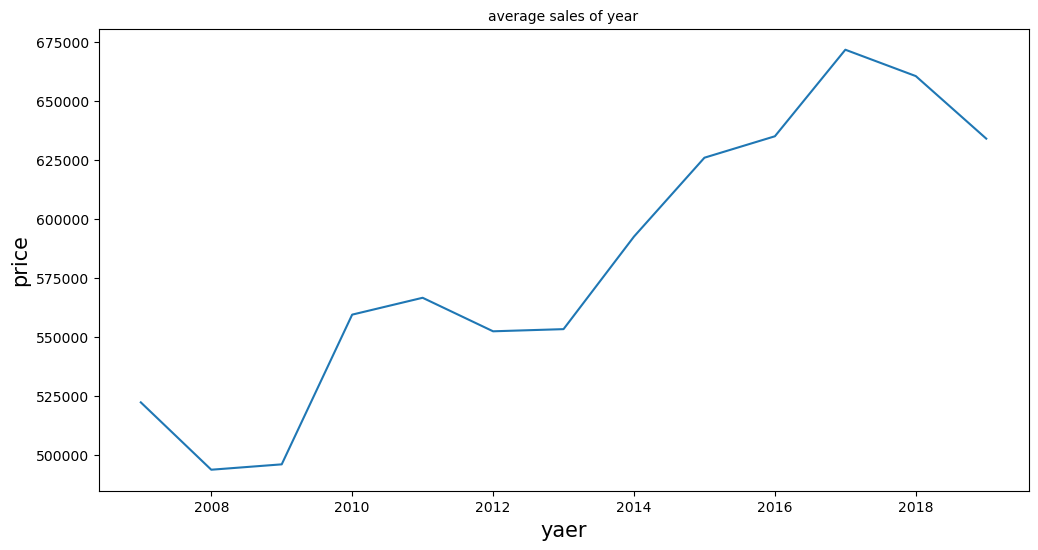

In [24]:
# 시간의 변동에 따른 추세를 보고싶어요
# 선 그래프(line graph)

fig, ax =plt.subplots(figsize=(12,6))

ax.plot(result.index,result.values)

ax.set_title( 'average sales of year', size = 10)
ax.set_xlabel('yaer', size= 15)
ax.set_ylabel('price', size= 15)

plt.savefig('../data/average price of year.png') # 그래프 저장 방법

plt.show()

In [25]:
# 막대 그래프(bar graph)

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [26]:
# 월별 막대 그래프를 x축 기준
# 2007년도 2008년도 병립

sales['year'] =sales['datesold'].dt.year

In [27]:
sales['month'] = sales['datesold'].dt.month

In [28]:
#sales.drop(columns=['yaer'], inplace=True)


In [29]:
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [30]:
sales['year'].isin([2007,2008,2009])

0         True
1         True
2         True
3         True
4         True
         ...  
29575    False
29576    False
29577    False
29578    False
29579    False
Name: year, Length: 29580, dtype: bool

In [31]:
condition = sales['year'].isin([2007,2008,2009]) # year의 2007,2008,2009만 True로 나머진 False로 구분

sales.loc[condition, :]                            # True 인 친구들만 추출

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12


In [32]:
df_condition = sales.loc[condition, :]  
df_condition.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12
24806,2009-12-24,2617,367000,unit,2,2009,12


In [33]:
#연도별, 월별 평균 가격을 알고싶어요

result = round(df_condition.groupby(['year','month'])['price'].agg('mean'),1)
result

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
      7        592078.9
      8        505608.7
      9        556875.0
      10       498600.0
      11       505442.3
      12       505737.0
2008  1        504428.6
      2        531080.0
      3        563500.0
      4        534204.5
      5        522394.7
      6        539092.6
      7        537453.1
      8        449510.4
      9        496778.7
      10       454822.0
      11       489546.3
      12       494410.8
2009  1        482238.6
      2        459281.6
      3        493931.2
      4        497882.6
      5        477808.7
      6        479053.2
      7        495982.1
      8        485465.9
      9        499597.2
      10       501456.3
      11       546882.3
      12       524921.4
Name: price, dtype: float64

In [34]:
result.index

MultiIndex([(2007,  2),
            (2007,  3),
            (2007,  4),
            (2007,  5),
            (2007,  6),
            (2007,  7),
            (2007,  8),
            (2007,  9),
            (2007, 10),
            (2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            (2008,  9),
            (2008, 10),
            (2008, 11),
            (2008, 12),
            (2009,  1),
            (2009,  2),
            (2009,  3),
            (2009,  4),
            (2009,  5),
            (2009,  6),
            (2009,  7),
            (2009,  8),
            (2009,  9),
            (2009, 10),
            (2009, 11),
            (2009, 12)],
           names=['year', 'month'])

In [35]:
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [36]:
result = result.reset_index()
result.head()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3


In [37]:
result['year']

0     2007
1     2007
2     2007
3     2007
4     2007
5     2007
6     2007
7     2007
8     2007
9     2007
10    2007
11    2008
12    2008
13    2008
14    2008
15    2008
16    2008
17    2008
18    2008
19    2008
20    2008
21    2008
22    2008
23    2009
24    2009
25    2009
26    2009
27    2009
28    2009
29    2009
30    2009
31    2009
32    2009
33    2009
34    2009
Name: year, dtype: int32

In [38]:
result['year'].unique()

array([2007, 2008, 2009])

In [39]:
result.loc[result['year']== 2007, :]

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [40]:
result_2007 = result.loc[result['year']== 2007, :]
result_2008 = result.loc[result['year']== 2008, :]
result_2009 = result.loc[result['year']== 2009, :]

print(result_2007[:3])
print()
print(result_2008[:3])
print()
print(result_2009[:3])

   year  month     price
0  2007      2  407500.0
1  2007      3  339333.3
2  2007      4  798000.0

    year  month     price
11  2008      1  504428.6
12  2008      2  531080.0
13  2008      3  563500.0

    year  month     price
23  2009      1  482238.6
24  2009      2  459281.6
25  2009      3  493931.2


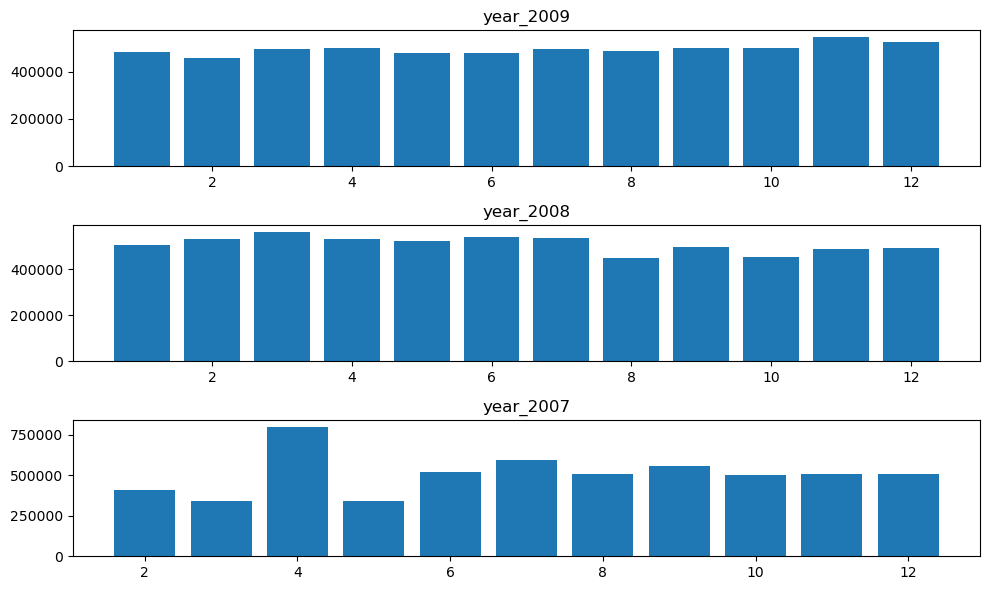

In [41]:
fig, ax = plt.subplots(nrows = 3 , ncols= 1, figsize=(10,6))

ax[0].bar(result_2009['month'],result_2009['price'])
ax[0].set_title('year_2009')


ax[1].bar(result_2008['month'],result_2008['price'])
ax[1].set_title('year_2008')


ax[2].bar(result_2007['month'],result_2007['price'])
ax[2].set_title('year_2007')

plt.tight_layout() #자동으로 레이아웃 조절
plt.show()


In [42]:
len(result['year'].unique())

3

In [43]:
type(len(result['year'].unique()))

int

0 2007
1 2008
2 2009


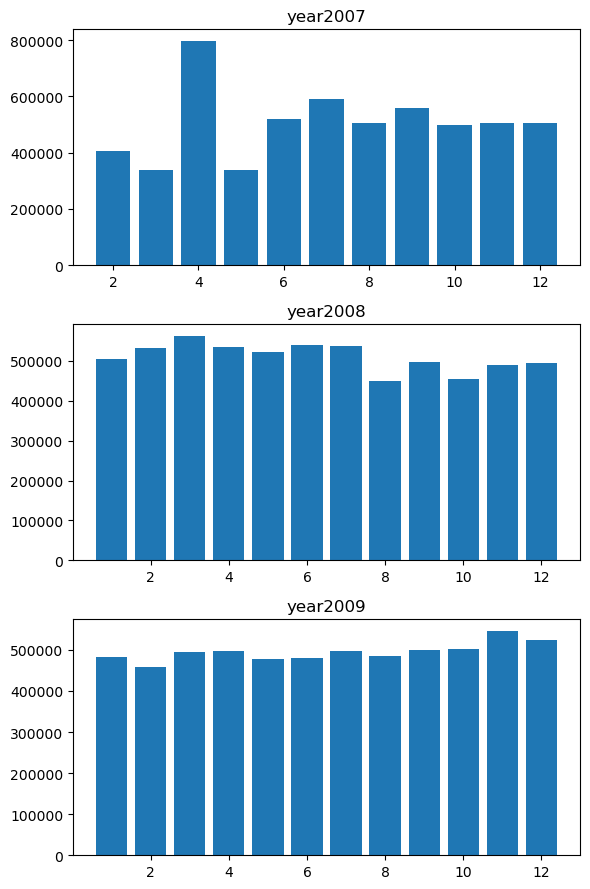

In [44]:
N= int(len(result['year'].unique()))

fig, ax = plt.subplots(nrows=N,ncols= 1, figsize = (6, 3*N))

for i,y in enumerate(result['year'].unique()):
    print(i,y)
    
    data = result.loc[result['year']==y]
    
    ax[i].bar(data['month'],data['price'])
    ax[i].set_title(f'year{y}')


plt.tight_layout()

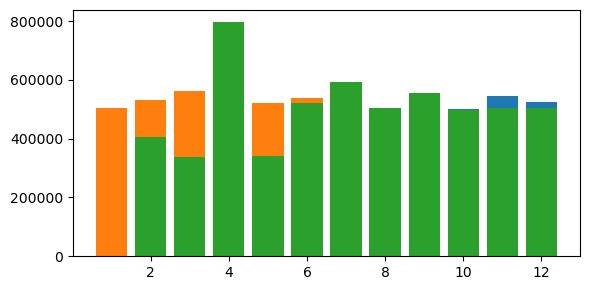

In [45]:
fig, ax = plt.subplots(figsize=(6,3))

ax.bar(result_2009['month'],result_2009['price'])
ax.bar(result_2008['month'],result_2008['price'])
ax.bar(result_2007['month'],result_2007['price'])

plt.tight_layout()

plt.show()

Seabron - sns

In [46]:
import pandas as pd
import seaborn as sns

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

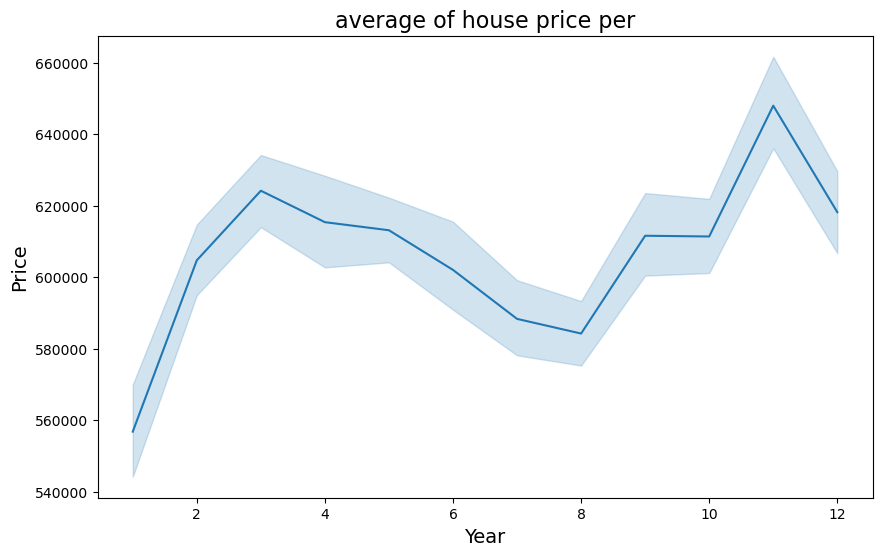

In [47]:
fig,ax = plt.subplots(figsize=(10,6))

sns.lineplot(data= sales, x = 'month', y = 'price',ax=ax)
ax.set_title('average of house price per',size = 16)
ax.set_xlabel('Year',size=14)
ax.set_ylabel('Price',size=14)


In [48]:
# barplt , outlier  이상치 제거

print(sales.head())
print(sales.tail())

    datesold  postcode   price propertyType  bedrooms  year  month
0 2007-02-07      2607  525000        house         4  2007      2
1 2007-02-27      2906  290000        house         3  2007      2
2 2007-03-07      2905  328000        house         3  2007      3
3 2007-03-09      2905  380000        house         4  2007      3
4 2007-03-21      2906  310000        house         3  2007      3
        datesold  postcode   price propertyType  bedrooms  year  month
29575 2019-07-25      2900  500000         unit         3  2019      7
29576 2019-07-25      2612  560000         unit         2  2019      7
29577 2019-07-26      2912  464950         unit         2  2019      7
29578 2019-07-26      2601  589000         unit         2  2019      7
29579 2019-07-26      2612  775000         unit         2  2019      7


In [49]:
sales['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [50]:
df = sales.copy()
df['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [51]:
condition = sales['year'].isin([2007,2008,2009,2010])

In [52]:
df= df.loc[condition,:]

df[:5]

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


In [53]:
#df.loc[df_condition,:]

In [54]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12
24987,2010-12-30,2602,389000,unit,2,2010,12


<Axes: xlabel='year', ylabel='price'>

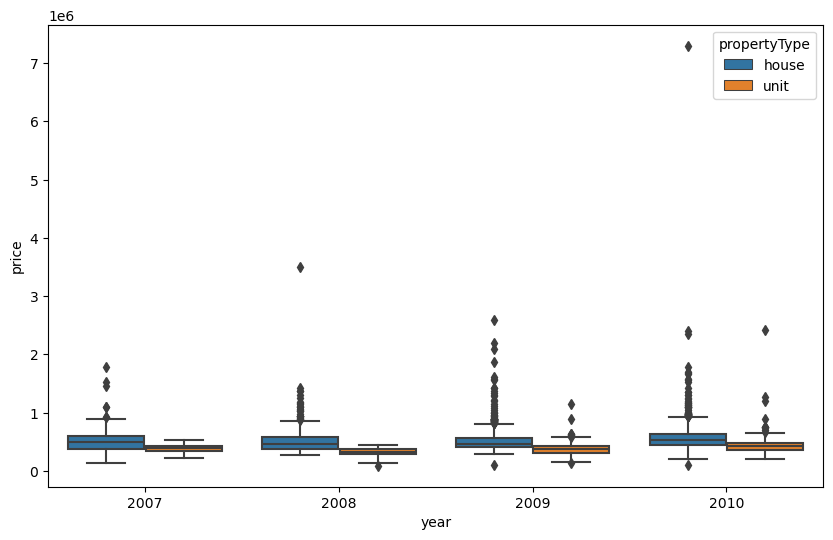

In [55]:
fig,ax = plt.subplots(figsize=(10,6))

sns.boxplot(data= df, x='year',y = 'price',hue = 'propertyType',ax=ax)
                                            #색상 = propertyType 별로 구분

In [56]:
# boxplot 개념

dat = {'values' : [10,12,12,13,12,11,14,13,15,102,120,12,18,14,14,17,18,19,20]}
date = {'values' : [10,12,12,13,12,11,14,13,15,102,120,12,18,14,14,17,18,19,20]}

temp_df = pd.DataFrame(dat)
temp = pd.DataFrame(date)

temp_df[:5]

,values
0,10
1,12
2,12
3,13
4,12


In [57]:
# 1단계 : 사분위수 (Q1, Q3 ,Q2 = median, IQR)

Q1 = temp_df['values'].quantile(0.25)
Q3 = temp_df['values'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print()
print(Q3)
print()
print(IQR)

12.0

18.0

6.0


In [58]:
# 2단계: 이상치 임계값(threshold) 설정

lower_bound = Q1 -1.5*IQR  #하한가
upper_bound = Q3 +1.5*IQR  #상한가

print(lower_bound)
print()
print(upper_bound)

3.0

27.0


In [59]:
condition = (temp_df['values'] <lower_bound) | (temp_df['values'] > upper_bound)

In [60]:
# 3단계: 이상치 확인

outlier = temp_df.loc[condition,:]

In [61]:
# 4단계 : 이상치 처리(제거, upper_bound, lower_bound로 편입)

# 1) 이상치  제거  -> 함수 remove_outlier
df_clean = temp_df.loc[~condition,:]        # ~condtion  제거

print(df_clean)

    values
0       10
1       12
2       12
3       13
4       12
5       11
6       14
7       13
8       15
11      12
12      18
13      14
14      14
15      17
16      18
17      19
18      20


In [62]:
#temp_df.iloc[10,1] = 120

#temp_upper = temp_df.copy()

In [63]:
# 2) bound에 편입
# 2-1 ) upper_bound에 편입

temp_df['values'] = temp_df['values'].apply(lambda x: min(x,upper_bound))

temp_df

,values
0,10.0
1,12.0
2,12.0
3,13.0
4,12.0
5,11.0
6,14.0
7,13.0
8,15.0
9,27.0


In [64]:
# 이상치 처리 함수 만들기

def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5*IQR  #하한가
    upper_bound = Q3 +1.5*IQR  #상한가
    
    
    condition = (df[column] <lower_bound) | (df[column] > upper_bound)
    
    outliers = df.loc[condition,:]
    temp_clean = df.loc[~condition,:].reset_index(drop=True)        # ~condtion  제거
    
    return temp_clean, outliers
    


In [65]:
temp

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
9,102


In [66]:
temp_1 =remove_outliers(temp,'values')

In [67]:
print(df.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       24978, 24979, 24980, 24981, 24982, 24983, 24984, 24985, 24986, 24987],
      dtype='int64', length=3767)


In [68]:
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [69]:
remove_outliers(df,'price')

(       datesold  postcode   price propertyType  bedrooms  year  month
 0    2007-02-07      2607  525000        house         4  2007      2
 1    2007-02-27      2906  290000        house         3  2007      2
 2    2007-03-07      2905  328000        house         3  2007      3
 3    2007-03-09      2905  380000        house         4  2007      3
 4    2007-03-21      2906  310000        house         3  2007      3
 ...         ...       ...     ...          ...       ...   ...    ...
 3576 2010-12-15      2612  415000         unit         1  2010     12
 3577 2010-12-20      2905  350000         unit         2  2010     12
 3578 2010-12-21      2612  640000         unit         2  2010     12
 3579 2010-12-24      2606  300000         unit         1  2010     12
 3580 2010-12-30      2602  389000         unit         2  2010     12
 
 [3581 rows x 7 columns],
         datesold  postcode    price propertyType  bedrooms  year  month
 7     2007-04-30      2606  1530000        hou

In [70]:
df_clean,outliers = remove_outliers(df,'price')

print(df_clean)

       datesold  postcode   price propertyType  bedrooms  year  month
0    2007-02-07      2607  525000        house         4  2007      2
1    2007-02-27      2906  290000        house         3  2007      2
2    2007-03-07      2905  328000        house         3  2007      3
3    2007-03-09      2905  380000        house         4  2007      3
4    2007-03-21      2906  310000        house         3  2007      3
...         ...       ...     ...          ...       ...   ...    ...
3576 2010-12-15      2612  415000         unit         1  2010     12
3577 2010-12-20      2905  350000         unit         2  2010     12
3578 2010-12-21      2612  640000         unit         2  2010     12
3579 2010-12-24      2606  300000         unit         1  2010     12
3580 2010-12-30      2602  389000         unit         2  2010     12

[3581 rows x 7 columns]


In [71]:
print(outliers)

        datesold  postcode    price propertyType  bedrooms  year  month
7     2007-04-30      2606  1530000        house         4  2007      4
18    2007-07-07      2602   900000        house         4  2007      7
26    2007-07-21      2603  1780000        house         4  2007      7
60    2007-09-21      2603  1460000        house         5  2007      9
64    2007-09-24      2612   920000        house         4  2007      9
...          ...       ...      ...          ...       ...   ...    ...
24769 2009-10-22      2604   890000         unit         2  2009     10
24812 2010-01-22      2604  2425000         unit         3  2010      1
24843 2010-03-19      2604  1200000         unit         2  2010      3
24965 2010-10-29      2600  1275000         unit         3  2010     10
24974 2010-11-27      2604   890000         unit         3  2010     11

[186 rows x 7 columns]


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

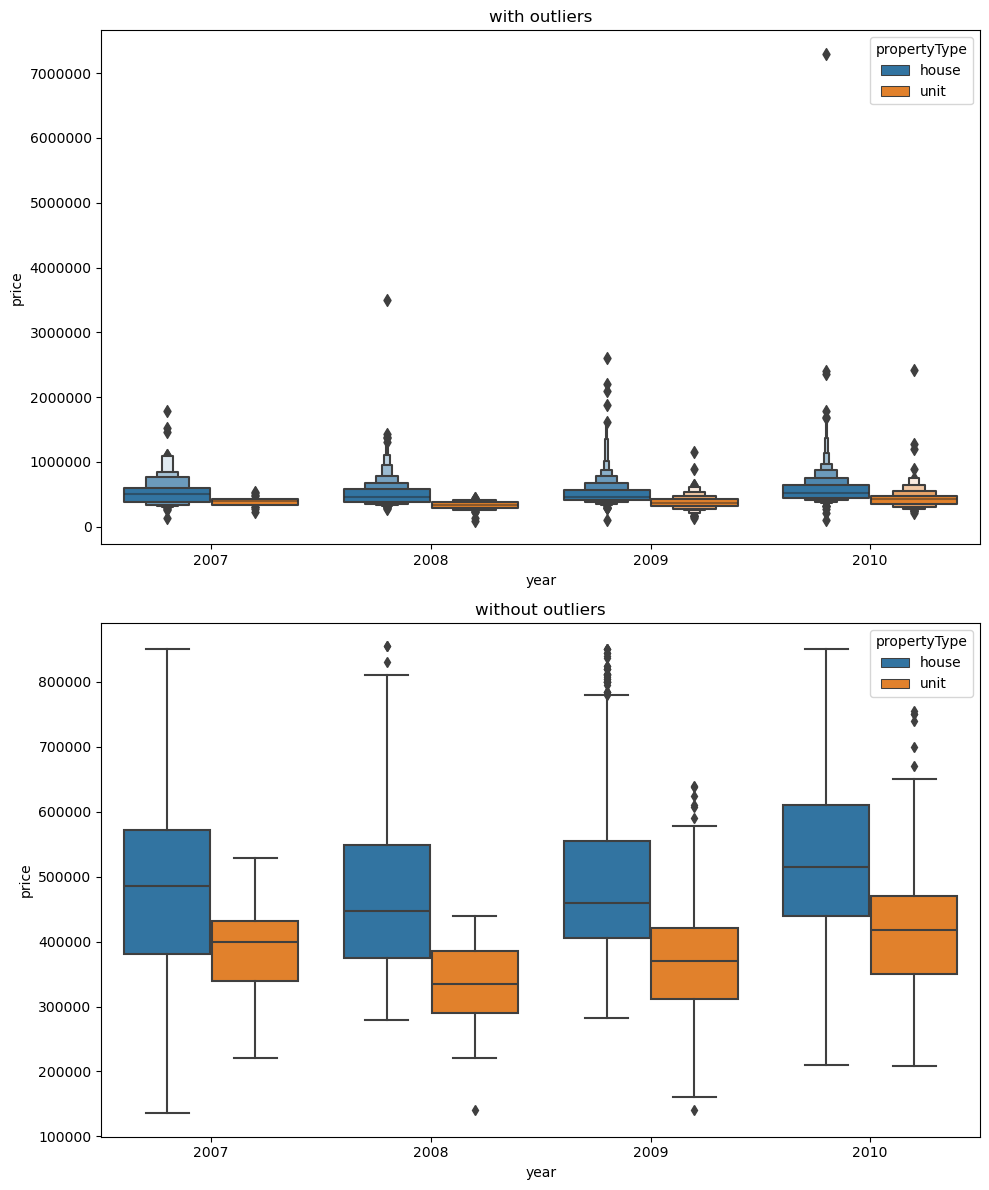

In [72]:
# 2007 ~ 2010 추출 결과 데이터 시각화

from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
# 과학적 표기법 비활성화 설정

fig, ax =plt. subplots(nrows=2, figsize=(10,12))
sns.boxenplot(data= df, x = 'year', y ='price',hue = 'propertyType', ax=ax[0])
ax[0].set_title('with outliers')
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(data=df_clean, x = 'year', y = 'price', hue = 'propertyType', ax=ax[1])
ax[1].set_title('without outliers')


plt.tight_layout()
plt.show()

In [73]:
#subsplots
# -> 다수의 그래프를 하나의 창에 나누어 그리는데 사용
# 데이터 가져오기
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\sea

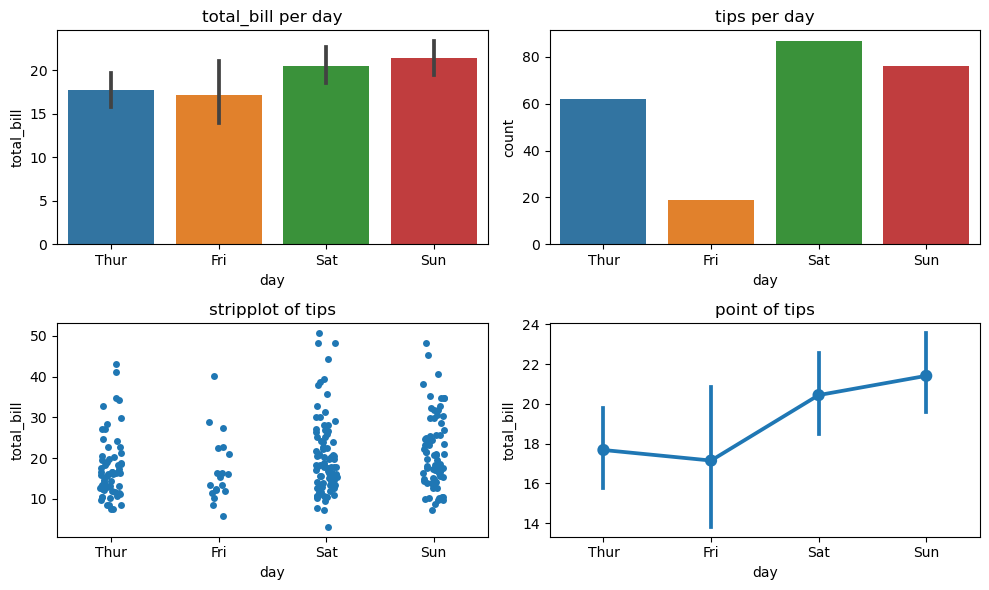

In [85]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(nrows = 2, ncols=2, figsize=(10,6))
# 요일별 총 청구금액 시각화
sns.barplot(x='day', y= 'total_bill', data= tips, ax=ax[0,0])
ax[0,0].set_title('total_bill per day')

sns.countplot(x='day',data= tips, ax=ax[0,1])
ax[0,1].set_title('tips per day')

sns.stripplot(x='day', y='total_bill',data= tips, ax=ax[1,0])
ax[1,0].set_title('stripplot of tips')

sns.pointplot(x= 'day', y= 'total_bill',data= tips, ax=ax[1,1])
ax[1,1].set_title('point of tips')

plt.tight_layout()
plt.savefig('subplots.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output/subplots.png'

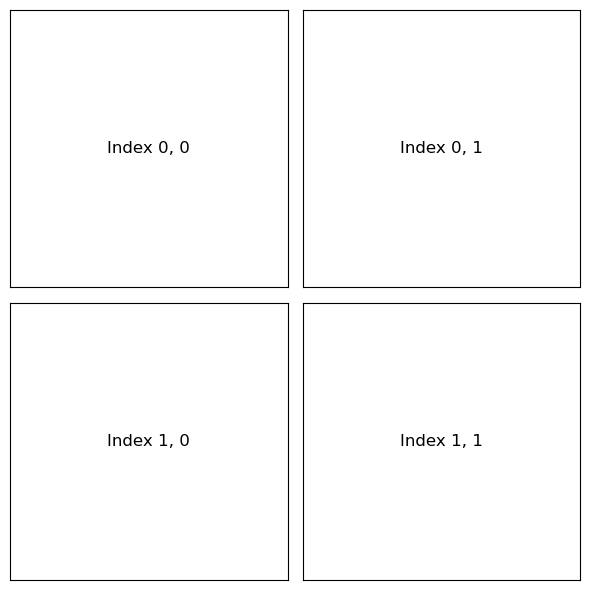

In [86]:
import matplotlib.pyplot as plt
# 설정: 2행 2열의 서브플롯 생성
nrows, ncols = 2, 2
# 서브플롯 생성
fig, axs = plt.subplots(nrows, ncols, figsize=(6, 6))
# 각 서브플롯에 인덱스 표시
for i in range(nrows):
    for j in range(ncols):
        axs[i, j].text(0.5, 0.5, f'Index {i}, {j}',
                       ha='center', va='center', fontsize=12)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
plt.tight_layout()
plt.savefig("output/subplots.png")
plt.show()

In [87]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [94]:
import plotly.graph_objects as go #저수준(low level) 그래프
import numpy as np

# 가상의 데이터 생성
x = np.arange(0,15,1)

y1,y2=x**2, x**3

#print(y1)
#print(y2)

# figure 생성
fig = go.Figure()

# 시각화 차트
fig.add_trace(go.Scatter(x=x,y=y1))
# 지정한 x,y1값을 plotly를 이용해서 산점도를 그래프 트레이스에 더해줘
fig.add_trace(go.Scatter(x=x,y=y2))
# 지정한 x,y2값을 plotly를 이용해서 산점도를 그래프 트레이스에 더해줘
fig.add_trace

# 시각화 차트 업데이트

fig.update_layout(
    title = 'basic graph', 
    xaxis_title = 'x축',
    yaxis_title = 'y축',
    template = 'plotly_white'
)

#그래프 보여주기


In [95]:
import plotly.graph_objects as go #저수준(low level) 그래프
import numpy as np

# 가상의 데이터 생성
x = np.arange(0,15,1)

y1,y2=x**2, x**3

#print(y1)
#print(y2)

# figure 생성
fig = go.Figure()

# 시각화 차트
for y in [y1,y2]:
    fig.add_trace(go.Scatter(x=x,y=y))

# 시각화 차트 업데이트

fig.update_layout(
    title = 'basic graph', 
    xaxis_title = 'x축',
    yaxis_title = 'y축',
    template = 'plotly_white'
)

#그래프 보여주기


In [96]:
data = {
    'x': ['a','b','c','d'],
    'y1': [10,15,13,17],
    'y2': [16,8,13,10]
}

In [100]:
import plotly.express as px


# 기본 차트
fig = px.bar(data, x= 'x', y='y1',title = 'basic chart')

#차트 추가
fig.add_trace(go.Scatter(x= data['x'], y=data['y2'],
                          mode= 'lines +markers', name= 'Line Chart'
                          ))

#막대 차트
fig.update_traces(marker_color = 'lightblue', selector = dict(type = 'scatter'))
            #막대의 색상을 lightblue로 설정     선택하다 =         type가 scatter(산점도)인 애들
# type가 산점도인 애들의 막대 색상을 lightblue로 설정


fig.show()



In [101]:
sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [103]:
result = sales.groupby('year')['price'].agg('mean')
result[:5]

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
Name: price, dtype: float64

In [105]:
fig = px.line(result, x = result.index,
              y = result.values,
              title = '연도별 평균 집 값 추이')
fig.show()

In [106]:
# 선 그래프
sales.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms', 'year',
       'month'],
      dtype='object')

In [109]:
sales['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [110]:
sales['datesold'].dt.month

0        2
1        2
2        3
3        3
4        3
        ..
29575    7
29576    7
29577    7
29578    7
29579    7
Name: datesold, Length: 29580, dtype: int32

In [111]:
sales['month'] = sales['datesold'].dt.month # sales에 새로운 month를  datesold의 month를 기준으로 만듦
sales['year'] = sales['datesold'].dt.year   # sales에 새로운 year를  datesold의 year를 기준으로 만듦
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [112]:
sales.tail(2)

,datesold,postcode,price,propertyType,bedrooms,year,month
29578,2019-07-26,2601,589000,unit,2,2019,7
29579,2019-07-26,2612,775000,unit,2,2019,7


In [114]:
# 2008년 vs 2018년 비교하기

condition = sales['year'].isin([2008,2018])
df = sales[condition]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1
...,...,...,...,...,...,...,...
29212,2018-12-21,2615,323000,unit,2,2018,12
29213,2018-12-21,2604,475000,unit,2,2018,12
29214,2018-12-21,2914,495000,unit,3,2018,12
29215,2018-12-21,2602,535000,unit,3,2018,12


In [115]:
df.groupby(['year','month'])['price'].agg('mean')
# 연과 월 별로 그룹을 나누고 가격의 평균을 구한다

year  month
2008  1        504428.571429
      2        531080.000000
      3        563500.000000
      4        534204.545455
      5        522394.736842
      6        539092.647059
      7        537453.125000
      8        449510.416667
      9        496778.651685
      10       454822.043011
      11       489546.330275
      12       494410.810811
2018  1        590753.808140
      2        666738.265854
      3        717516.058824
      4        665040.377095
      5        669840.556561
      6        660528.720238
      7        628073.993289
      8        629684.079208
      9        658647.394464
      10       655744.728223
      11       654334.517241
      12       674591.105023
Name: price, dtype: float64

In [116]:
df.groupby(['year','month'])['price'].agg('mean').reset_index()
# 연과 월 별로 그룹을 나누고 가격의 평균을 구한것을 인덱스로 반환

,year,month,price
0,2008,1,504428.571429
1,2008,2,531080.000000
2,2008,3,563500.000000
3,2008,4,534204.545455
4,2008,5,522394.736842
5,2008,6,539092.647059
6,2008,7,537453.125000
7,2008,8,449510.416667
8,2008,9,496778.651685
9,2008,10,454822.043011


In [117]:
result = round(df.groupby(['year','month'])['price'].agg('mean').reset_index(),1)
# 연과 월 별로 그룹을 나누고 가격의 평균을 구한것을 인덱스로 반환 것을 result 라고 지정하고 소수점 1째 자리까지만 나오도록 설정
result.head()


,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0
3,2008,4,534204.5
4,2008,5,522394.7


In [ ]:
import plotly.io as pio
pio.templates.default = 'ploty_white'

fig = px.line(result)

In [118]:
# 막대그래프

import pandas as pd
import plotly
import numpy as np

result.head(3)

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0


In [119]:
# 다중차트 그리기
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objects as go


In [125]:
pio.templates.default = 'plotly_white'

fig =make_subplots(rows=2,cols=1 ,
                   subplot_titles=('2008년 차트', '2018년 차트'))

for i,year in enumerate([2008,2018]):
    #print(i,year)
    data = result.loc[result['year']==year, : ]
    # print(data)
    fig.add_trace(go.Bar(x=data['month'],y = data['price'], name = str(year)),
           row= i+1, col=1)

fig.update_layout(title = 'average house price by month and year',
                  xaxis_title = 'month',
                  yaxis_title = 'price',
                  height= 500)
fig.show()

In [132]:
import plotly.graph_objects as go
import pandas as pd

# map
month_map = {1:'1월',2:'2월',3:'3월',4:'4월',5:'5월',6:'6월',
             7:'JULY',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}

# 월 변경
#result['month']
# 매핑한 '월' 생성
result['month_map']=result['month'].map(month_map)


# 그래프 그리기
fig = go.Figure()

# 막대 그래프
for year in [2008,2018]:
    yearly_data = result[result['year'] == year]
    fig.add_trace(go.Bar(
        x = yearly_data['month_map'],
        y= yearly_data['price'],
        name = str(year),
        marker_color = 'blue' if year == 2008 else 'red'
    ))

# 업데이트 레이아웃
fig.update_layout(
    barmode = 'group',
    title = '평균 가격 비교(2008 vs 2018)',
    xaxis = dict(
        tickmode= 'array', 
        tickvals = list(month_map.values()),
        ticktext = list(month_map.values())
    ),
    yaxis_title = '평균가격',
    height = 500
)

fig.show()


In [133]:
# Butterfly Chart

pio.templates.default = 'plotly_white'

result

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [134]:
result.loc[result['year']==2008]

,year,month,price,month_map
0,2008,1,504428.6,1월
1,2008,2,531080.0,2월
2,2008,3,563500.0,3월
3,2008,4,534204.5,4월
4,2008,5,522394.7,5월
5,2008,6,539092.6,6월
6,2008,7,537453.1,JULY
7,2008,8,449510.4,AUG
8,2008,9,496778.7,SEP
9,2008,10,454822.0,OCT


In [137]:
data_2018= result.loc[result['year']==2018,:]
data_2008= result.loc[result['year']==2008,:]

In [138]:
# 천(1000)단위 구분

[x for x in data_2008['price']]

[504428.6,
 531080.0,
 563500.0,
 534204.5,
 522394.7,
 539092.6,
 537453.1,
 449510.4,
 496778.7,
 454822.0,
 489546.3,
 494410.8]

In [139]:
[f'{x:,.0f} 'for x in data_2008['price']]

['504,429 ',
 '531,080 ',
 '563,500 ',
 '534,204 ',
 '522,395 ',
 '539,093 ',
 '537,453 ',
 '449,510 ',
 '496,779 ',
 '454,822 ',
 '489,546 ',
 '494,411 ']

In [140]:
formatted_price_2008 =[f'{x:,.0f} 'for x in data_2008['price']]
formatted_price_2018 =[f'{x:,.0f} 'for x in data_2018['price']]

print(formatted_price_2008)
print('*******************************')
print(formatted_price_2018)


['504,429 ', '531,080 ', '563,500 ', '534,204 ', '522,395 ', '539,093 ', '537,453 ', '449,510 ', '496,779 ', '454,822 ', '489,546 ', '494,411 ']
*******************************
['590,754 ', '666,738 ', '717,516 ', '665,040 ', '669,841 ', '660,529 ', '628,074 ', '629,684 ', '658,647 ', '655,745 ', '654,334 ', '674,591 ']


In [153]:
# 버터플라이 그래프 그리기
fig = go.Figure()
# 2008년
fig.add_trace(go.Bar(
  x=data_2008['price'],
  y=data_2008['month'],
  name = '2008년',
  marker_color = 'skyblue',
  orientation='h', # 막대그래프를 가로형(horizontal)
  text=formatted_price_2008,
  textposition='inside'
))
# 2018년
fig.add_trace(go.Bar(
  x=data_2018['price'],
  y=data_2018['month'],
  name = '2018년',
  marker_color = 'pink',
  orientation='h', # 막대그래프를 가로형(horizontal)
  text=formatted_price_2018,
  textposition='inside'
))
fig.update_layout(
  title = '평균가격 비교: 2008년 vs 2018년',
  xaxis_title = '',         # x축 제목 (비워둠)
  #showlegend=False,        # 범례 표시
  barmode='relative',       # bar mode (상대적 위치로 지정)
  bargap = 0.25,            # bar 사이의 간격
  height = 500,             # 전체 높이
  # 주석추가
  annotations= [
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2008', showarrow=False, font=dict(color='blue', size=14)),
      dict(x=0.25, y=1.07, xref='paper', yref='paper', text='2018', showarrow=False, font=dict(color='red', size=14))
  ]
)

    # annotations 의 x = 0.25 --> 그래프 가로의 길이의 25% 위치
    # xref = 'paper' : 전체 그래프 영역 기준, 좌표 설정 1page에 맞춘다는 뜻??
    # showarrow = False : 주석에 화살표 표시
fig.show()

In [154]:
# box plot

pio.templates.default = 'plotly_white'

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [162]:
df = sales[sales['year'].isin([2007,2008,2009,2010])]
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [163]:
df = df[df['price'] <= 700000]

In [164]:
df

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,2010,12
24984,2010-12-20,2905,350000,unit,2,2010,12
24985,2010-12-21,2612,640000,unit,2,2010,12
24986,2010-12-24,2606,300000,unit,1,2010,12


In [165]:
fig = px.box(df, x = 'year', y = 'price', color = 'propertyType',
             points = 'all',hover_data = df.columns)

# points : 개별 데이터 포인트 표시
# hover_data : data에 마우스를 갖다대면 데이터의 정보를 표시해준다

fig.show()

In [168]:
df.columns

[f'{col}:{df[col]}'for col in df.columns]

['datesold:0       2007-02-07\n1       2007-02-27\n2       2007-03-07\n3       2007-03-09\n4       2007-03-21\n           ...    \n24983   2010-12-15\n24984   2010-12-20\n24985   2010-12-21\n24986   2010-12-24\n24987   2010-12-30\nName: datesold, Length: 3306, dtype: datetime64[ns]',
 'postcode:0        2607\n1        2906\n2        2905\n3        2905\n4        2906\n         ... \n24983    2612\n24984    2905\n24985    2612\n24986    2606\n24987    2602\nName: postcode, Length: 3306, dtype: int64',
 'price:0        525000\n1        290000\n2        328000\n3        380000\n4        310000\n          ...  \n24983    415000\n24984    350000\n24985    640000\n24986    300000\n24987    389000\nName: price, Length: 3306, dtype: int64',
 'propertyType:0        house\n1        house\n2        house\n3        house\n4        house\n         ...  \n24983     unit\n24984     unit\n24985     unit\n24986     unit\n24987     unit\nName: propertyType, Length: 3306, dtype: object',
 'bedrooms:0    

In [166]:
def format_hover_text(df):
    return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}'for col in df.columns]), axis = 1)

format_hover_text(sales.loc[sales['propertyType']=='unit'])

24552    datesold:2007-06-27 00:00:00<br>postcode:2606<...
24553    datesold:2007-07-05 00:00:00<br>postcode:2611<...
24554    datesold:2007-07-19 00:00:00<br>postcode:2607<...
24555    datesold:2007-07-20 00:00:00<br>postcode:2604<...
24556    datesold:2007-08-07 00:00:00<br>postcode:2617<...
                               ...                        
29575    datesold:2019-07-25 00:00:00<br>postcode:2900<...
29576    datesold:2019-07-25 00:00:00<br>postcode:2612<...
29577    datesold:2019-07-26 00:00:00<br>postcode:2912<...
29578    datesold:2019-07-26 00:00:00<br>postcode:2601<...
29579    datesold:2019-07-26 00:00:00<br>postcode:2612<...
Length: 5028, dtype: object

In [174]:
def format_hover_text(df):
    return df.apply(lambda row: '<br>'.join([f'{col}:{row[col]}'for col in df.columns]), axis = 1)

fig = go.Figure()
fig.add_trace(
    go.Box(
        x=df.loc[df['propertyType']=='house','year'],
        y = df['price'], name= 'house',
        boxpoints = 'all',pointpos= -1.8
    )
)
fig.add_trace(
    go.Box(
        x=df.loc[df['propertyType']=='unit','year'],
        y = df['price'], name= 'unit',
        hoverinfo = 'text',
        text = format_hover_text(sales.loc[sales['propertyType']=='unit'])
    )
)
fig.update_traces(hoverlabel = dict(bgcolor = 'rgba(255,99,71,0.3)'),
                  selector = dict(name = 'unit'))

fig.update_layout(boxmode= 'group')



fig.show()

In [175]:
# plotly chart
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

df= px.data.tips()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [220]:
df.groupby('day')[['total_bill','tip']].mean()

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


In [221]:
df.groupby('day')[['total_bill','tip']].mean().index

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [222]:
df.groupby('day')[['total_bill','tip']].mean().reset_index()


,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [223]:
avg_df = df.groupby('day')[['total_bill','tip']].mean().reset_index()
print(type(avg_df))

<class 'pandas.core.frame.DataFrame'>


In [224]:
day_order = ['Thursday','Friday','Saturday','Sunday']
day_full_names = {'Thur':'Thursday','Fri':'Friday','Sat':'Saturday','Sun':'Sunday'}

In [225]:
avg_df

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [226]:
avg_df['day'].map(day_full_names)

0      Friday
1    Saturday
2      Sunday
3    Thursday
Name: day, dtype: object

In [227]:
avg_df['day'] = avg_df['day'].map(day_full_names)
avg_df

,day,total_bill,tip
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132
3,Thursday,17.682742,2.771452


In [228]:
pd.Categorical(avg_df['day'],categories = day_order)

['Friday', 'Saturday', 'Sunday', 'Thursday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [229]:
avg_df['day']= pd.Categorical(avg_df['day'],categories = day_order)

In [230]:
avg_df

,day,total_bill,tip
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132
3,Thursday,17.682742,2.771452


In [231]:
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         4 non-null      category
 1   total_bill  4 non-null      float64 
 2   tip         4 non-null      float64 
dtypes: category(1), float64(2)
memory usage: 404.0 bytes


In [232]:
avg_df.sort_values('day')

,day,total_bill,tip
3,Thursday,17.682742,2.771452
0,Friday,17.151579,2.734737
1,Saturday,20.441379,2.993103
2,Sunday,21.410000,3.255132


In [233]:
avg_df.sort_values('day').reset_index(drop=True)

,day,total_bill,tip
0,Thursday,17.682742,2.771452
1,Friday,17.151579,2.734737
2,Saturday,20.441379,2.993103
3,Sunday,21.410000,3.255132


In [234]:
avg_df['day'] #인덱스를 달고온다
avg_df['day'].values #이렇게 하면 값만 나옴

['Friday', 'Saturday', 'Sunday', 'Thursday']
Categories (4, object): ['Thursday', 'Friday', 'Saturday', 'Sunday']

In [235]:
px.bar(avg_df, x = 'day', y = 'tip',labels={'tip':'average total bill'},
       text_auto='.2s',color = 'day',
       color_discrete_map = {'Thurday':'gray','Friday':'gray',
                             'Saturday':'gray','Sunday':'red'})

fig.update_traces(textfont_size = 12, textangle= 0, textposition = 'outside', cliponaxis = False)

colors = ['red' if day == 'Sunday' else 'gray' for day in avg_df['day'].values]

fig.add_trace(go.Scatter(x = avg_df['day'],y=avg_df['total_bill'],
                         mode='lines+markers', name = 'average_bill',
                         line=dict(color = 'darkgray',width = 2),
                         marker =dict(color= colors, size = 8)
                         ))
# y축 정의 grid lines
max_value = max(avg_df['total_bill'].max(), avg_df['tip'].max())
yaxis_range = round(max_value+7 - (max_value % 10))

# x축, y축 범례 정의
fig_update_layout(
    title = 'Average Total Bill and Tip by Day',
    xaxis = dict(
        title = 'Day of the Week',
        tickmode = 'array',
        tickvals = day_order
    ),
    yaxis = dict(
        title = 'Average Amount(US$)',
        range = [0, yaxis_range],
        tickmode = 'liner',         # tick : 눈금자, tickmode = 'liner' 눈금을 선형적으로 배치
        tick0 = 0,                  # tick0 : y축의 첫번째 눈금의 위치를 정의
        dtick = 5,                  # dtick : distance of tick 눈금 거리(눈금 간 간격) 각 눈금은 각각 5단위
        showgrid = True,
        gridcolor = 'lightgray',
        gridwidth = 0.5,
        griddash = 'dot'
    ),
    plot_bgcolor = 'white',
    legend_title = 'Data Type',
    legend = dict(
        orientation = 'h',
        x = 0.5,
        xanchor = 'center',
        y= -0.5,
        yanchor = 'bottom',
        bgcolor = 'rgba(255,255,255,0.5)',
        bordercolor = 'Black'
    )
)

# y축 grid line 추가
for i in range(10,yaxis_range + 1,10):
    fig.add_shape(
        type = 'line',
        x0 = -0.5,
        y0 = i,
        x1 = 3.5,
        y1 = i,
        line_dash = 'dot',
        line = dict(color = 'black', width = 1)
    )


plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



ValueError: Invalid property specified for object of type plotly.graph_objs.Box: 'textfont'

Did you mean "text"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        boxmean
            If True, the mean of the box(es)' underlying
            distribution is drawn as a dashed line inside the
            box(es). If "sd" the standard deviation is also drawn.
            Defaults to True when `mean` is set. Defaults to "sd"
            when `sd` is set Otherwise defaults to False.
        boxpoints
            If "outliers", only the sample points lying outside the
            whiskers are shown If "suspectedoutliers", the outlier
            points are shown and points either less than 4*Q1-3*Q3
            or greater than 4*Q3-3*Q1 are highlighted (see
            `outliercolor`) If "all", all sample points are shown
            If False, only the box(es) are shown with no sample
            points Defaults to "suspectedoutliers" when
            `marker.outliercolor` or `marker.line.outliercolor` is
            set. Defaults to "all" under the q1/median/q3
            signature. Otherwise defaults to "outliers".
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step for multi-box traces set
            using q1/median/q3.
        dy
            Sets the y coordinate step for multi-box traces set
            using q1/median/q3.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.box.Hoverlabel` instance
            or dict with compatible properties
        hoveron
            Do the hover effects highlight individual boxes  or
            sample points or both?
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        jitter
            Sets the amount of jitter in the sample points drawn.
            If 0, the sample points align along the distribution
            axis. If 1, the sample points are drawn in a random
            jitter of width equal to the width of the box(es).
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.box.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        line
            :class:`plotly.graph_objects.box.Line` instance or dict
            with compatible properties
        lowerfence
            Sets the lower fence values. There should be as many
            items as the number of boxes desired. This attribute
            has effect only under the q1/median/q3 signature. If
            `lowerfence` is not provided but a sample (in `y` or
            `x`) is set, we compute the lower as the last sample
            point below 1.5 times the IQR.
        lowerfencesrc
            Sets the source reference on Chart Studio Cloud for
            `lowerfence`.
        marker
            :class:`plotly.graph_objects.box.Marker` instance or
            dict with compatible properties
        mean
            Sets the mean values. There should be as many items as
            the number of boxes desired. This attribute has effect
            only under the q1/median/q3 signature. If `mean` is not
            provided but a sample (in `y` or `x`) is set, we
            compute the mean for each box using the sample values.
        meansrc
            Sets the source reference on Chart Studio Cloud for
            `mean`.
        median
            Sets the median values. There should be as many items
            as the number of boxes desired.
        mediansrc
            Sets the source reference on Chart Studio Cloud for
            `median`.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover. For box traces, the name will
            also be used for the position coordinate, if `x` and
            `x0` (`y` and `y0` if horizontal) are missing and the
            position axis is categorical
        notched
            Determines whether or not notches are drawn. Notches
            displays a confidence interval around the median. We
            compute the confidence interval as median +/- 1.57 *
            IQR / sqrt(N), where IQR is the interquartile range and
            N is the sample size. If two boxes' notches do not
            overlap there is 95% confidence their medians differ.
            See https://sites.google.com/site/davidsstatistics/home
            /notched-box-plots for more info. Defaults to False
            unless `notchwidth` or `notchspan` is set.
        notchspan
            Sets the notch span from the boxes' `median` values.
            There should be as many items as the number of boxes
            desired. This attribute has effect only under the
            q1/median/q3 signature. If `notchspan` is not provided
            but a sample (in `y` or `x`) is set, we compute it as
            1.57 * IQR / sqrt(N), where N is the sample size.
        notchspansrc
            Sets the source reference on Chart Studio Cloud for
            `notchspan`.
        notchwidth
            Sets the width of the notches relative to the box'
            width. For example, with 0, the notches are as wide as
            the box(es).
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the box(es). If "v" ("h"), the
            distribution is visualized along the vertical
            (horizontal).
        pointpos
            Sets the position of the sample points in relation to
            the box(es). If 0, the sample points are places over
            the center of the box(es). Positive (negative) values
            correspond to positions to the right (left) for
            vertical boxes and above (below) for horizontal boxes
        q1
            Sets the Quartile 1 values. There should be as many
            items as the number of boxes desired.
        q1src
            Sets the source reference on Chart Studio Cloud for
            `q1`.
        q3
            Sets the Quartile 3 values. There should be as many
            items as the number of boxes desired.
        q3src
            Sets the source reference on Chart Studio Cloud for
            `q3`.
        quartilemethod
            Sets the method used to compute the sample's Q1 and Q3
            quartiles. The "linear" method uses the 25th percentile
            for Q1 and 75th percentile for Q3 as computed using
            method #10 (listed on http://www.amstat.org/publication
            s/jse/v14n3/langford.html). The "exclusive" method uses
            the median to divide the ordered dataset into two
            halves if the sample is odd, it does not include the
            median in either half - Q1 is then the median of the
            lower half and Q3 the median of the upper half. The
            "inclusive" method also uses the median to divide the
            ordered dataset into two halves but if the sample is
            odd, it includes the median in both halves - Q1 is then
            the median of the lower half and Q3 the median of the
            upper half.
        sd
            Sets the standard deviation values. There should be as
            many items as the number of boxes desired. This
            attribute has effect only under the q1/median/q3
            signature. If `sd` is not provided but a sample (in `y`
            or `x`) is set, we compute the standard deviation for
            each box using the sample values.
        sdsrc
            Sets the source reference on Chart Studio Cloud for
            `sd`.
        selected
            :class:`plotly.graph_objects.box.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.box.Stream` instance or
            dict with compatible properties
        text
            Sets the text elements associated with each sample
            value. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.box.Unselected` instance
            or dict with compatible properties
        upperfence
            Sets the upper fence values. There should be as many
            items as the number of boxes desired. This attribute
            has effect only under the q1/median/q3 signature. If
            `upperfence` is not provided but a sample (in `y` or
            `x`) is set, we compute the lower as the last sample
            point above 1.5 times the IQR.
        upperfencesrc
            Sets the source reference on Chart Studio Cloud for
            `upperfence`.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        whiskerwidth
            Sets the width of the whiskers relative to the box'
            width. For example, with 1, the whiskers are as wide as
            the box(es).
        width
            Sets the width of the box in data coordinate If 0
            (default value) the width is automatically selected
            based on the positions of other box traces in the same
            subplot.
        x
            Sets the x sample data or coordinates. See overview for
            more info.
        x0
            Sets the x coordinate for single-box traces or the
            starting coordinate for multi-box traces set using
            q1/median/q3. See overview for more info.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y sample data or coordinates. See overview for
            more info.
        y0
            Sets the y coordinate for single-box traces or the
            starting coordinate for multi-box traces set using
            q1/median/q3. See overview for more info.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "text"?

Bad property path:
textfont_size
^^^^^^^^

In [212]:
max_value = max(avg_df['total_bill'].max(), avg_df['tip'].max())
print(max_value)

21.41


In [213]:
round(max_value+7 - (max_value % 10))

27